# Explainig the dataset

# Import the data

In [1]:
import pandas as pd
from prophet import Prophet
import numpy as np
import matplotlib.pyplot as plt
import random
import seaborn as sns

In [4]:
avo_df = pd.read_csv('avocado.csv')

In [5]:
avo_df

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


# Exploring the data

In [6]:
avo_df.head(5)

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [7]:
avo_df.tail(3)

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico
18248,11,2018-01-07,1.62,17489.58,2894.77,2356.13,224.53,12014.15,11988.14,26.01,0.0,organic,2018,WestTexNewMexico


In [9]:
#sorting the dataframe based on date
avo_df = avo_df.sort_values("Date")
avo_df

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
11569,51,2015-01-04,1.75,27365.89,9307.34,3844.81,615.28,13598.46,13061.10,537.36,0.00,organic,2015,Southeast
11829,51,2015-01-04,1.46,612910.15,233286.13,216611.20,4370.99,158641.83,115068.71,43573.12,0.00,organic,2015,TotalUS
11777,51,2015-01-04,1.70,1885.48,748.62,30.19,0.00,1106.67,1106.67,0.00,0.00,organic,2015,Tampa
675,51,2015-01-04,0.99,668086.00,117454.09,429518.41,5553.60,115559.90,67894.33,47661.52,4.05,conventional,2015,Denver
1247,51,2015-01-04,0.92,101162.98,1991.63,75090.16,283.88,23797.31,7769.36,16027.95,0.00,conventional,2015,Louisville
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8670,0,2018-03-25,1.21,330371.24,87782.44,137599.47,131.89,104857.44,95210.59,7089.08,2557.77,conventional,2018,HarrisburgScranton
17997,0,2018-03-25,1.52,15372.80,2399.71,3164.80,0.00,9808.29,9789.70,18.59,0.00,organic,2018,PhoenixTucson
17733,0,2018-03-25,1.46,31489.27,5372.35,1047.92,0.00,25069.00,23054.17,2014.83,0.00,organic,2018,DallasFtWorth
8706,0,2018-03-25,1.05,228837.36,53795.52,53103.06,7008.97,114929.81,96343.12,15834.92,2751.77,conventional,2018,Indianapolis


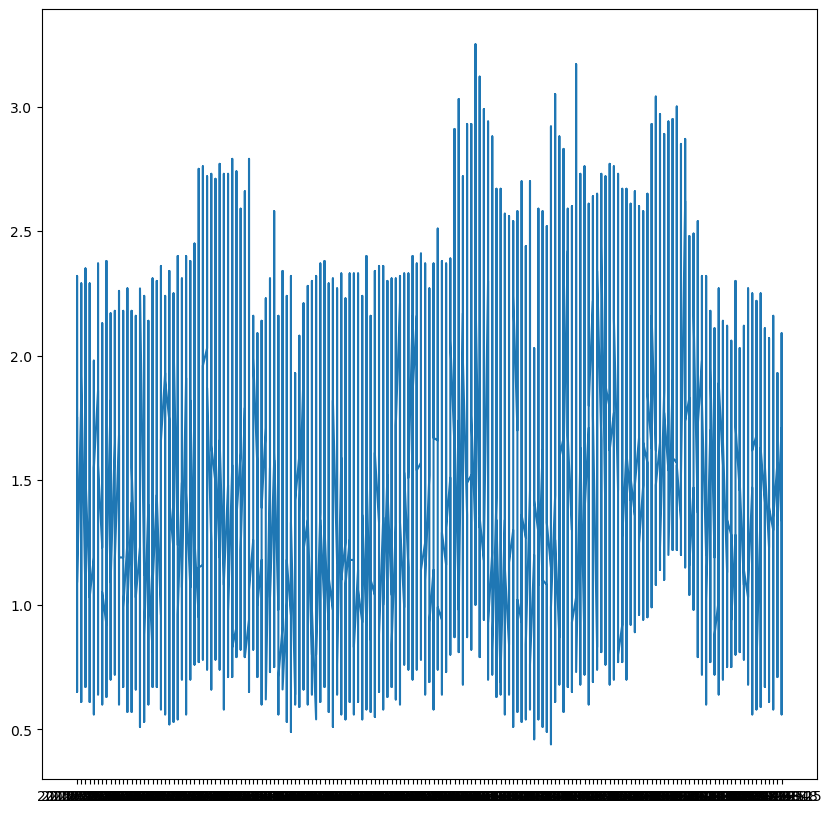

In [11]:
plt.figure(figsize=(10,10))
plt.plot(avo_df['Date'], avo_df['AveragePrice'])

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53]),
 [Text(0, 0, 'Southeast'),
  Text(1, 0, 'TotalUS'),
  Text(2, 0, 'Tampa'),
  Text(3, 0, 'Denver'),
  Text(4, 0, 'Louisville'),
  Text(5, 0, 'HartfordSpringfield'),
  Text(6, 0, 'Charlotte'),
  Text(7, 0, 'Portland'),
  Text(8, 0, 'Nashville'),
  Text(9, 0, 'Columbus'),
  Text(10, 0, 'Sacramento'),
  Text(11, 0, 'NewOrleansMobile'),
  Text(12, 0, 'SanDiego'),
  Text(13, 0, 'LosAngeles'),
  Text(14, 0, 'GreatLakes'),
  Text(15, 0, 'PhoenixTucson'),
  Text(16, 0, 'Indianapolis'),
  Text(17, 0, 'Philadelphia'),
  Text(18, 0, 'Detroit'),
  Text(19, 0, 'Jacksonville'),
  Text(20, 0, 'RichmondNorfolk'),
  Text(21, 0, 'BuffaloRochester'),
  Text(22, 0, 'Northeast'),
  Text(23, 0, 'SouthCarolina'),
  Text(24, 0, 'West'),
  Text(25, 0, 'California'),

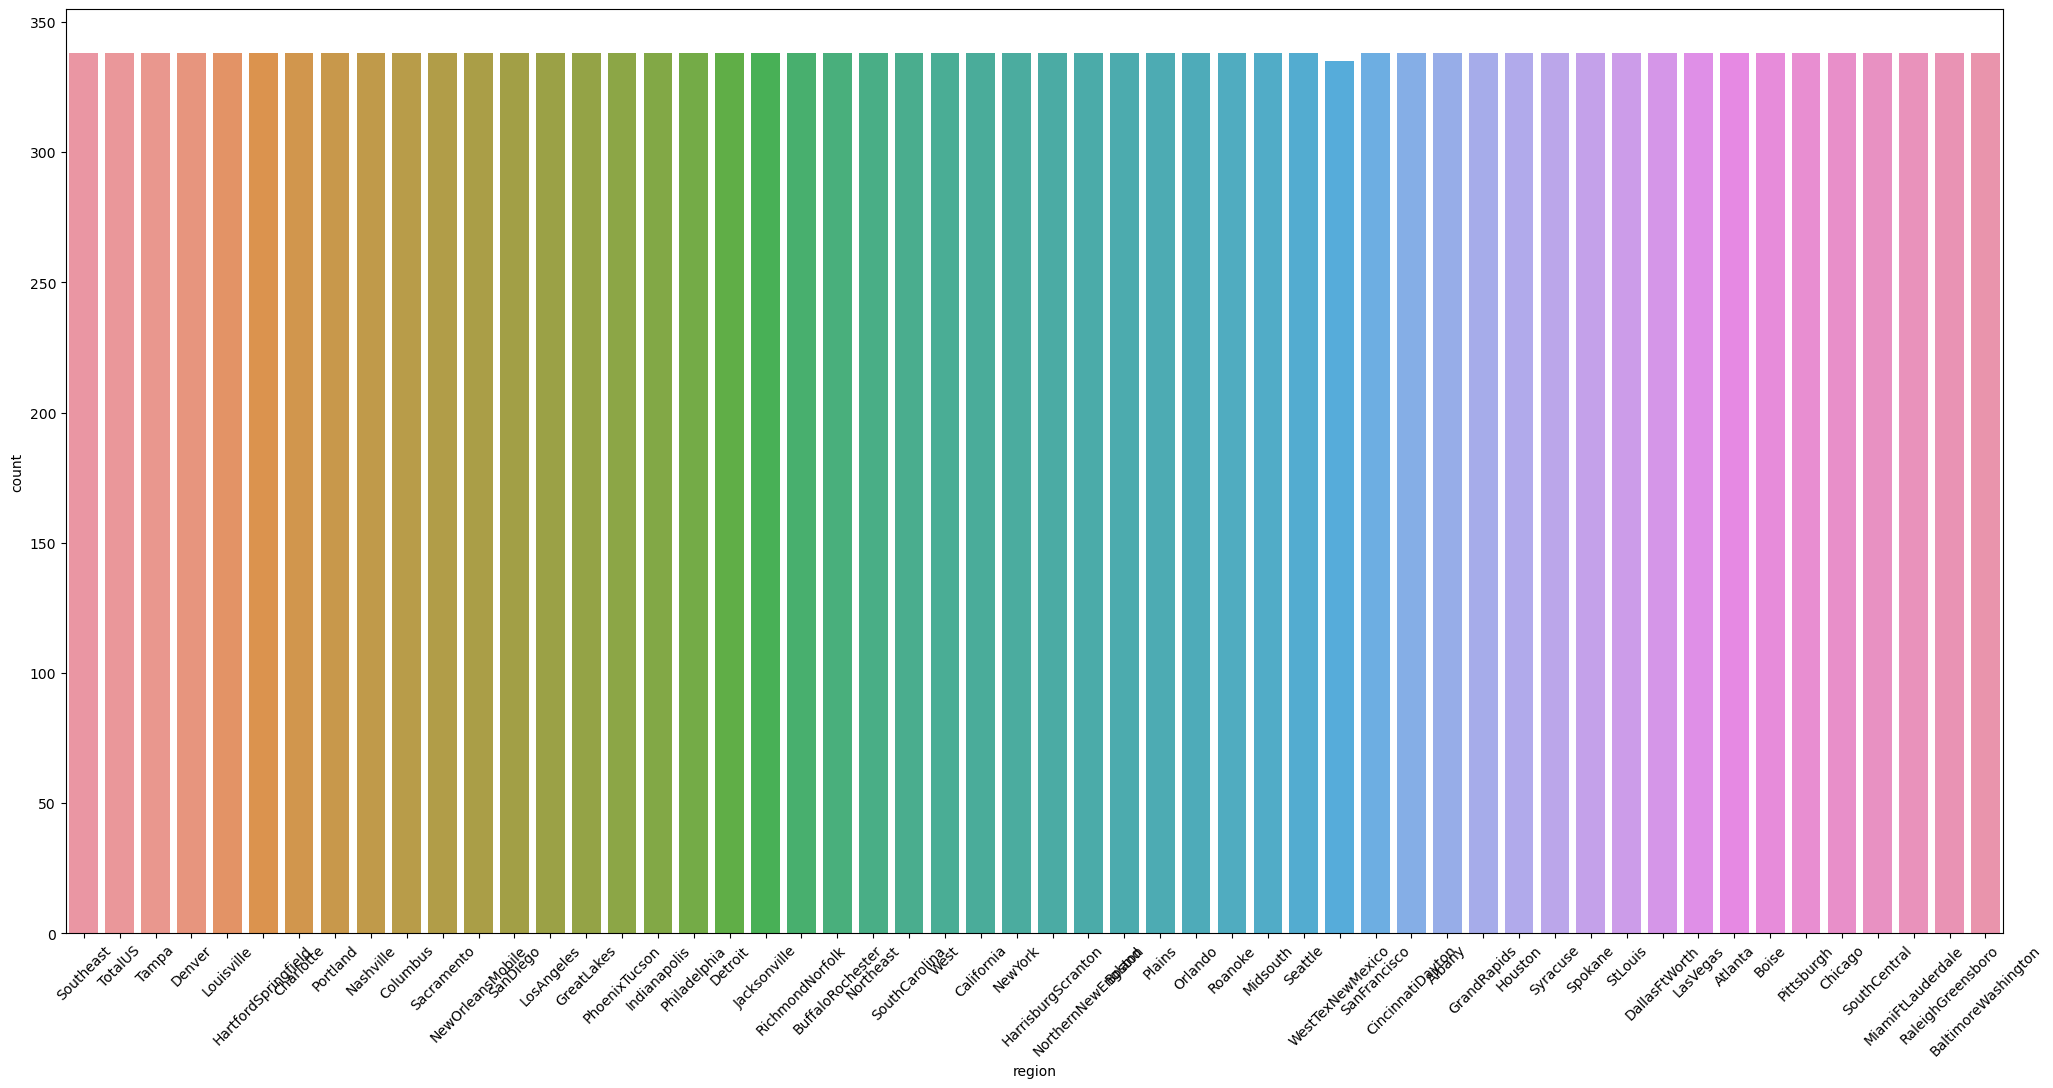

In [14]:
# Data based on the region is balanced
plt.figure(figsize=(25,12))
sns.countplot(x = 'region',data = avo_df)
plt.xticks(rotation = 45)

<AxesSubplot:xlabel='year', ylabel='count'>

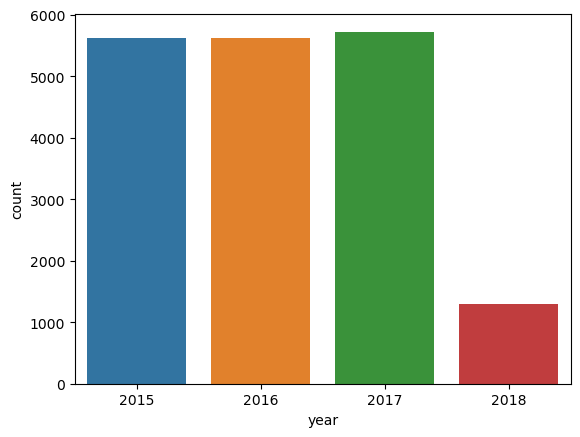

In [15]:
sns.countplot(x = 'year', data = avo_df)

In [17]:
avo_prophet = avo_df[['Date', 'AveragePrice']]
avo_prophet

,Date,AveragePrice
11569,2015-01-04,1.75
11829,2015-01-04,1.46
11777,2015-01-04,1.70
675,2015-01-04,0.99
1247,2015-01-04,0.92
...,...,...
8670,2018-03-25,1.21
17997,2018-03-25,1.52
17733,2018-03-25,1.46
8706,2018-03-25,1.05


# Preparing the data for prophet and train model


In [19]:
avo_prophet = avo_prophet.rename(columns={'Date':'ds', 'AveragePrice':'y'})

In [21]:
m = Prophet()
m.fit(avo_prophet)

18:14:35 - cmdstanpy - INFO - Chain [1] start processing
18:14:39 - cmdstanpy - INFO - Chain [1] done processing


In [23]:
#forcast the future
future = m.make_future_dataframe(periods= 365)
forcast = m.predict(future)

In [24]:
forcast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2015-01-04,1.498900,0.880538,1.844445,1.498900,1.498900,-0.114468,-0.114468,-0.114468,-0.114468,-0.114468,-0.114468,0.0,0.0,0.0,1.384432
1,2015-01-11,1.493703,0.881916,1.881946,1.493703,1.493703,-0.106082,-0.106082,-0.106082,-0.106082,-0.106082,-0.106082,0.0,0.0,0.0,1.387621
2,2015-01-18,1.488505,0.893511,1.859776,1.488505,1.488505,-0.105817,-0.105817,-0.105817,-0.105817,-0.105817,-0.105817,0.0,0.0,0.0,1.382688
3,2015-01-25,1.483308,0.891858,1.905614,1.483308,1.483308,-0.124851,-0.124851,-0.124851,-0.124851,-0.124851,-0.124851,0.0,0.0,0.0,1.358457
4,2015-02-01,1.478111,0.825162,1.791901,1.478111,1.478111,-0.153288,-0.153288,-0.153288,-0.153288,-0.153288,-0.153288,0.0,0.0,0.0,1.324823
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
529,2019-03-21,1.172630,0.549922,1.603482,0.992358,1.352123,-0.087326,-0.087326,-0.087326,-0.087326,-0.087326,-0.087326,0.0,0.0,0.0,1.085304
530,2019-03-22,1.171921,0.557151,1.607804,0.990690,1.352361,-0.085617,-0.085617,-0.085617,-0.085617,-0.085617,-0.085617,0.0,0.0,0.0,1.086304
531,2019-03-23,1.171212,0.582566,1.584610,0.989022,1.352600,-0.083632,-0.083632,-0.083632,-0.083632,-0.083632,-0.083632,0.0,0.0,0.0,1.087581
532,2019-03-24,1.170503,0.552811,1.613765,0.987369,1.352839,-0.081390,-0.081390,-0.081390,-0.081390,-0.081390,-0.081390,0.0,0.0,0.0,1.089113


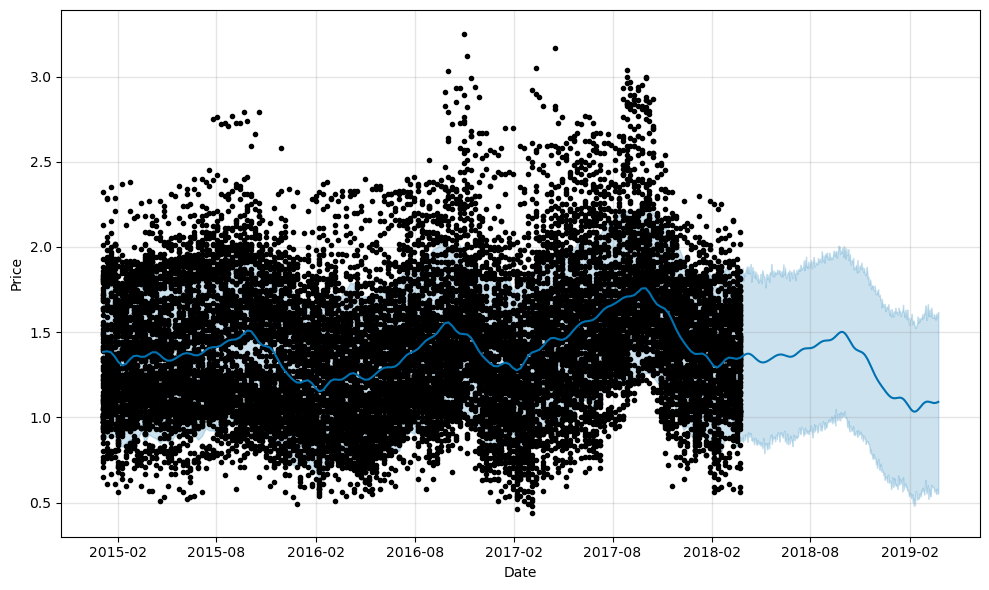

In [28]:
figure = m.plot(forcast, xlabel='Date', ylabel= 'Price')

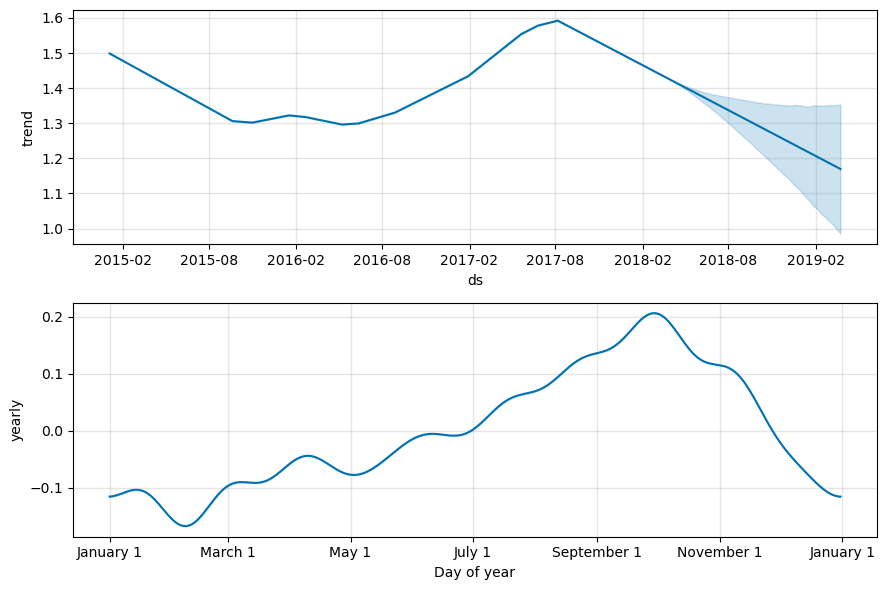

In [26]:
figure = m.plot_components(forcast)

# Region specific

In [30]:
avocado_df_sample = avo_df[avo_df['region'] == 'West']
avocado_df_sample

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
2755,51,2015-01-04,0.89,5794410.58,2275446.87,2582300.65,97024.09,839638.97,688813.01,150819.57,6.39,conventional,2015,West
11881,51,2015-01-04,1.40,187548.30,70313.71,72942.11,24.30,44268.18,10023.72,34244.46,0.00,organic,2015,West
2754,50,2015-01-11,0.95,5333097.71,2203111.92,2292761.26,127412.09,709812.44,598705.08,111073.82,33.54,conventional,2015,West
11880,50,2015-01-11,1.39,223156.55,80139.16,111395.01,63.88,31558.50,9296.76,22261.74,0.00,organic,2015,West
11879,49,2015-01-18,1.33,251749.94,64328.76,147608.30,69.05,39743.83,7442.17,32301.66,0.00,organic,2015,West
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9104,2,2018-03-11,1.00,6906412.50,2442241.76,1695925.97,130983.00,2637261.77,1435608.59,1184730.56,16922.62,conventional,2018,West
9103,1,2018-03-18,0.99,7254940.65,2099082.66,1707752.84,115997.93,3332107.22,1333247.05,1982086.02,16774.15,conventional,2018,West
18226,1,2018-03-18,1.73,210067.47,33437.98,47165.54,110.40,129353.55,73163.12,56020.24,170.19,organic,2018,West
9102,0,2018-03-25,0.93,7667064.46,2567279.74,1912986.38,118289.91,3068508.43,1309580.19,1745630.06,13298.18,conventional,2018,West


In [32]:
avocado_df_sample = avocado_df_sample.sort_values('Date')
avocado_df_sample

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
2755,51,2015-01-04,0.89,5794410.58,2275446.87,2582300.65,97024.09,839638.97,688813.01,150819.57,6.39,conventional,2015,West
11881,51,2015-01-04,1.40,187548.30,70313.71,72942.11,24.30,44268.18,10023.72,34244.46,0.00,organic,2015,West
2754,50,2015-01-11,0.95,5333097.71,2203111.92,2292761.26,127412.09,709812.44,598705.08,111073.82,33.54,conventional,2015,West
11880,50,2015-01-11,1.39,223156.55,80139.16,111395.01,63.88,31558.50,9296.76,22261.74,0.00,organic,2015,West
11879,49,2015-01-18,1.33,251749.94,64328.76,147608.30,69.05,39743.83,7442.17,32301.66,0.00,organic,2015,West
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9104,2,2018-03-11,1.00,6906412.50,2442241.76,1695925.97,130983.00,2637261.77,1435608.59,1184730.56,16922.62,conventional,2018,West
9103,1,2018-03-18,0.99,7254940.65,2099082.66,1707752.84,115997.93,3332107.22,1333247.05,1982086.02,16774.15,conventional,2018,West
18226,1,2018-03-18,1.73,210067.47,33437.98,47165.54,110.40,129353.55,73163.12,56020.24,170.19,organic,2018,West
9102,0,2018-03-25,0.93,7667064.46,2567279.74,1912986.38,118289.91,3068508.43,1309580.19,1745630.06,13298.18,conventional,2018,West


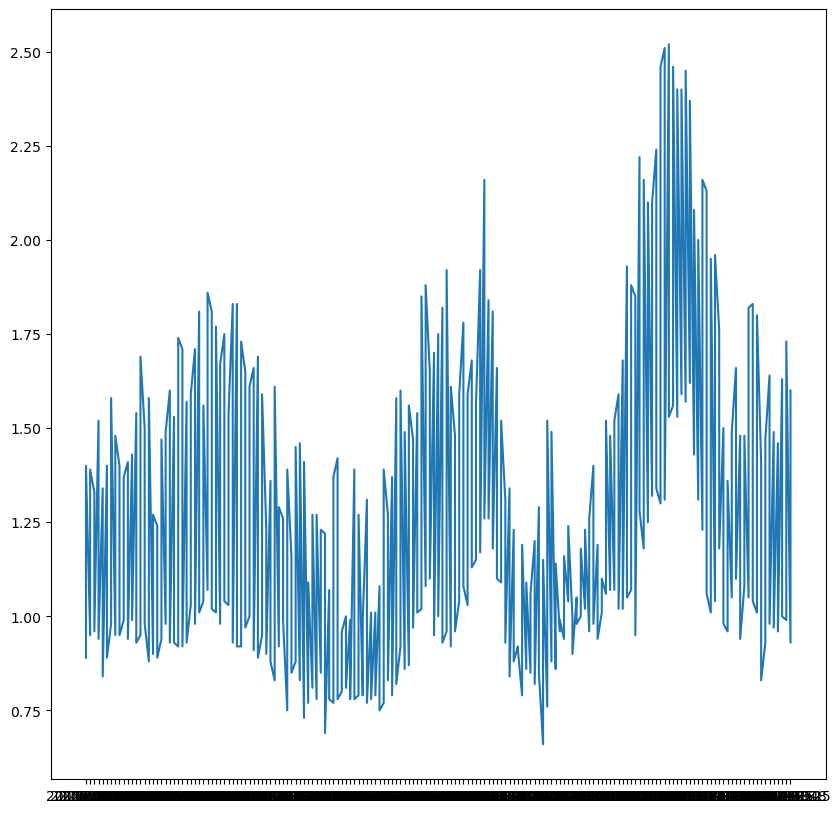

In [34]:
plt.figure(figsize=(10,10))
plt.plot(avocado_df_sample['Date'], avocado_df_sample['AveragePrice'])

In [35]:
avocado_df_sample = avocado_df_sample.rename(columns={'Date':'ds', 'AveragePrice':'y'})

In [ ]:
avocado_df_sample = avocado_df_sample[[]]

In [36]:
m = Prophet()
m.fit(avocado_df_sample)
future = m.make_future_dataframe(periods= 365)

18:25:27 - cmdstanpy - INFO - Chain [1] start processing
18:25:27 - cmdstanpy - INFO - Chain [1] done processing


In [37]:
forcast = m.predict(future)

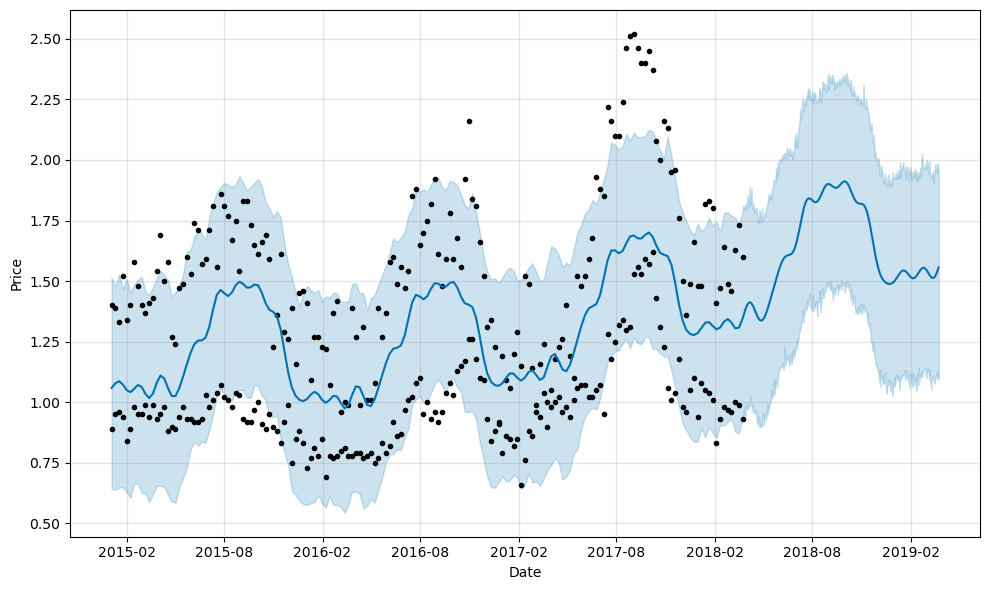

In [38]:
figure = m.plot(forcast, xlabel='Date', ylabel='Price')

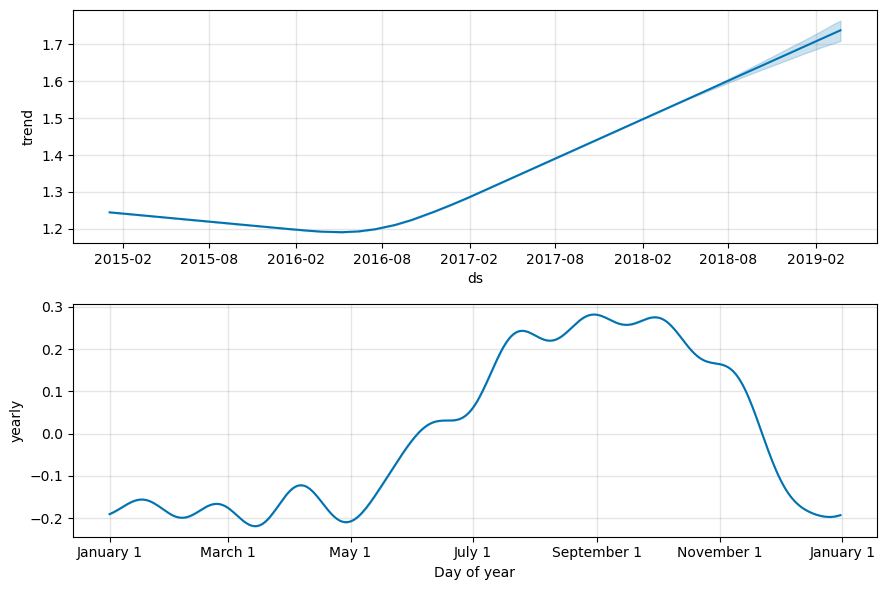

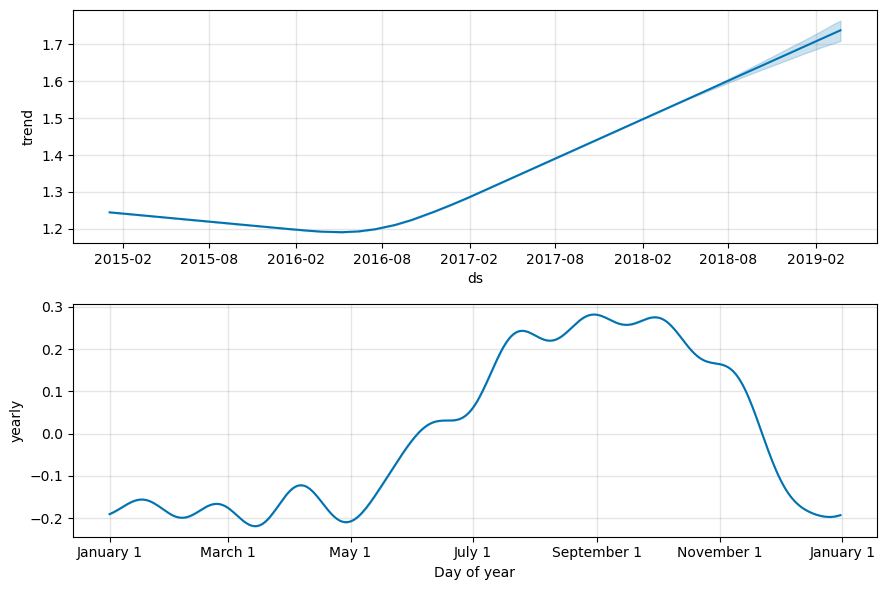

In [39]:
m.plot_components(forcast)